<a href="https://colab.research.google.com/github/gowdakushal223/pdkushal/blob/main/assienment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [27]:
df=pd.read_csv("/content/test.csv")

In [28]:
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [29]:
X=df.drop(columns=["fc"])
y=df["pc"]

In [30]:
scaler=StandardScaler()

In [34]:
data_scaled=scaler.fit_transform(df)

In [35]:
kmeans=KMeans(n_clusters=2,init="k-means++")
kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [36]:
kmeans.inertia_

19675.834469055837

In [37]:
SSE=[]
for cluster in range(1,20):
  kmeans=KMeans(n_clusters=cluster,init="k-means++")
  kmeans.fit(data_scaled)
  SSE.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'interia')

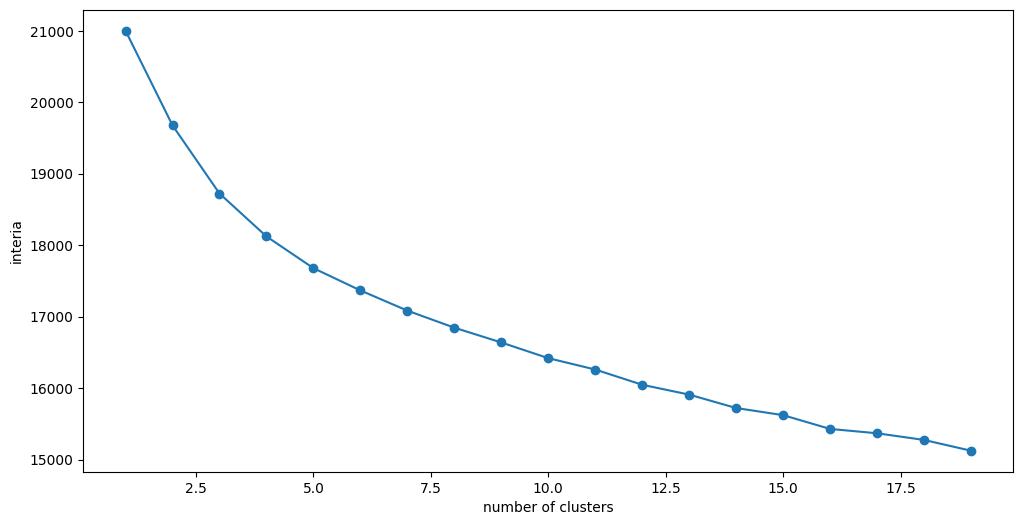

In [38]:
frame=pd.DataFrame({"cluster":range(1,20), "SSE":SSE})
plt.figure(figsize=(12,6))
plt.plot(frame["cluster"],frame["SSE"],marker="o")
plt.xlabel("number of clusters")
plt.ylabel("interia")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 572587384.5373421


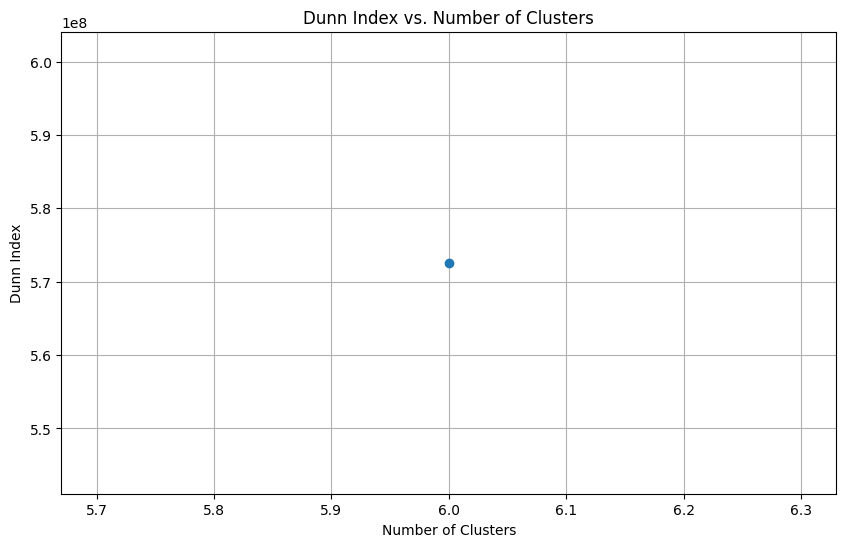

In [39]:
n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(X)

inertia = kmeans.inertia_
print("Inertia:", inertia)
plt.figure(figsize=(10, 6))
plt.plot(n_clusters,inertia, marker='o', linestyle='-')
plt.title("Dunn Index vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Dunn Index")
plt.grid(True)
plt.show()

Dunn Index: 1.227812165352149


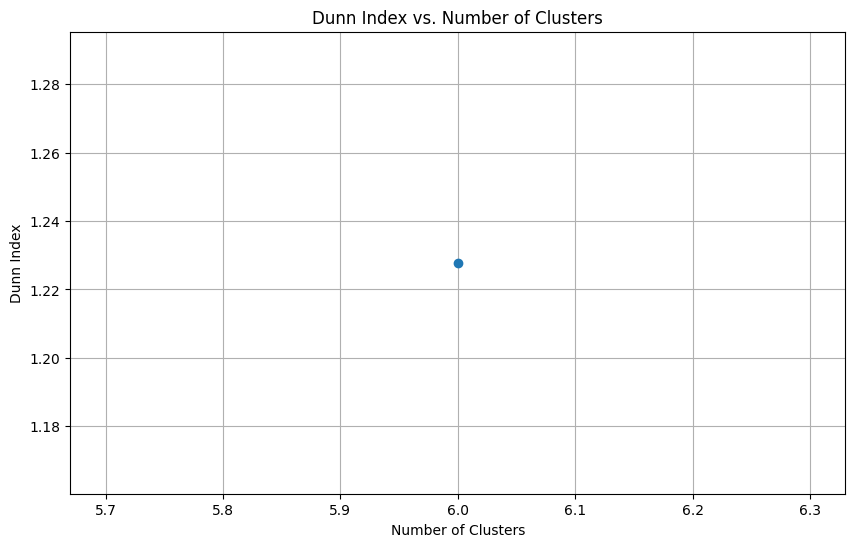

In [40]:
from sklearn.metrics import pairwise_distances
import itertools

cluster_centers = kmeans.cluster_centers_
inter_cluster_distances = pairwise_distances(cluster_centers, metric='euclidean')

intra_cluster_distances = []
labels = kmeans.labels_
for i in range(n_clusters):
    cluster_points = X[labels == i]
    if len(cluster_points) > 1:
      distances = pairwise_distances(cluster_points, metric='euclidean')
      max_intra_distance = np.max(distances)
      intra_cluster_distances.append(max_intra_distance)
      cluster_range = range(2, 11)
dunn_indices = []

dunn_index = np.max(inter_cluster_distances) / np.max(intra_cluster_distances)
print("Dunn Index:", dunn_index)
plt.figure(figsize=(10, 6))
plt.plot(n_clusters,dunn_index, marker='o', linestyle='-')
plt.title("Dunn Index vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Dunn Index")
plt.grid(True)
plt.show()

In [41]:
#PCA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv("/content/test.csv")

In [42]:
X=df.drop(columns=["fc"])
y=df["pc"]

In [44]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std

In [45]:
n_components = 5
pca = PCA(n_components=n_components)

In [46]:
X_reduced = pca.fit_transform(X_standardized)

In [47]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

Explained Variance Ratios: [0.08067771 0.07815086 0.07551614 0.05935826 0.05780066]


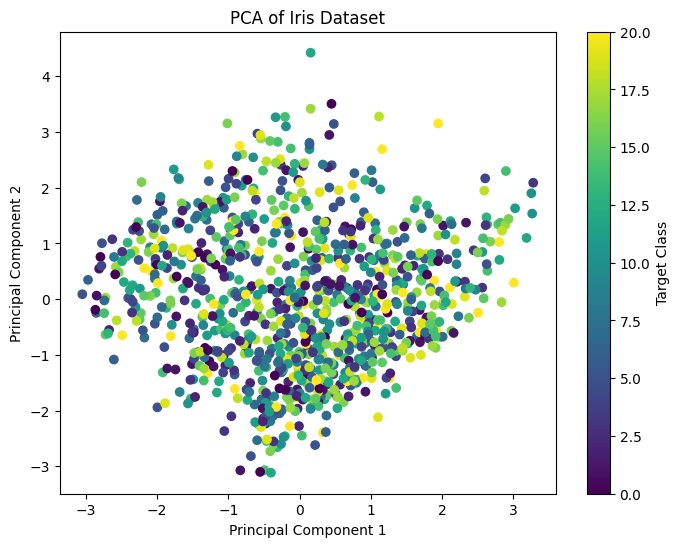

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Target Class')
plt.show()